# <center>Spotify Top 10 000 streamed songs.<br>Exploratory Data Analysis</center>

In [1]:
### Importing all python modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# downloading data

data = pd.read_csv('D:/Analysis\Spotify_final_dataset.csv')

In [3]:
data

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302.0,1,(x29),2118242,883369738
1,2,Juice WRLD,Lucid Dreams,1673,178.0,1,(x20),2127668,864832399
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212.0,1,(x4),1660502,781153024
3,4,J. Cole,No Role Modelz,2547,6.0,7,0,659366,734857487
4,5,Post Malone,rockstar,1223,186.0,1,(x124),2905678,718865961
...,...,...,...,...,...,...,...,...,...
11079,11080,The Band Perry,If I Die Young,1,0.0,184,0,51321,51321
11080,11081,Justin Timberlake,Not a Bad Thing,1,0.0,196,0,49512,49512
11081,11082,Mike WiLL Made,It 23,1,0.0,167,0,46547,46547
11082,11083,The Vamps,Somebody To You,1,0.0,200,0,44962,44962


In [4]:
# check some information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11084 entries, 0 to 11083
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Position                11084 non-null  int64  
 1   Artist Name             11084 non-null  object 
 2   Song Name               11080 non-null  object 
 3   Days                    11084 non-null  int64  
 4   Top 10 (xTimes)         11084 non-null  float64
 5   Peak Position           11084 non-null  int64  
 6   Peak Position (xTimes)  11084 non-null  object 
 7   Peak Streams            11084 non-null  int64  
 8   Total Streams           11084 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 779.5+ KB


In [5]:
# let's convert some coulmns to the string type for comfortable future work and analysis

data['Artist Name'] = data['Artist Name'].apply(lambda x: x[:-1]).astype('string')
data['Song Name'] = data['Song Name'].astype('string')

In [6]:
# let's check for any null values in the dataset
data[data.isnull().any(axis=1)]

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
5506,5507,Jenny Duncan,<NA>,1,1.0,10,0,1737605,1737605
6217,6218,Dj Ozuna,<NA>,6,0.0,122,0,231840,1198268
7177,7178,Daniel Marcy,<NA>,1,0.0,20,0,710534,710534
8215,8216,Amy Kaylee,<NA>,2,0.0,125,0,213438,412133


In [7]:
# each artist has only one song, so let's fill null values with their artists' names

# data[data['Artist Name']=='Jenny Duncan']
# data[data['Artist Name']=='Dj Ozuna']
# data[data['Artist Name']=='Daniel Marcy']
# data[data['Artist Name']=='Amy Kaylee']

In [8]:
data['Song Name'] = data['Song Name'].fillna(data['Artist Name'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11084 entries, 0 to 11083
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Position                11084 non-null  int64  
 1   Artist Name             11084 non-null  string 
 2   Song Name               11084 non-null  string 
 3   Days                    11084 non-null  int64  
 4   Top 10 (xTimes)         11084 non-null  float64
 5   Peak Position           11084 non-null  int64  
 6   Peak Position (xTimes)  11084 non-null  object 
 7   Peak Streams            11084 non-null  int64  
 8   Total Streams           11084 non-null  int64  
dtypes: float64(1), int64(5), object(1), string(2)
memory usage: 779.5+ KB


<font size=4>Everything seems fine, so I may start doing th exploratory data analysis.</font>

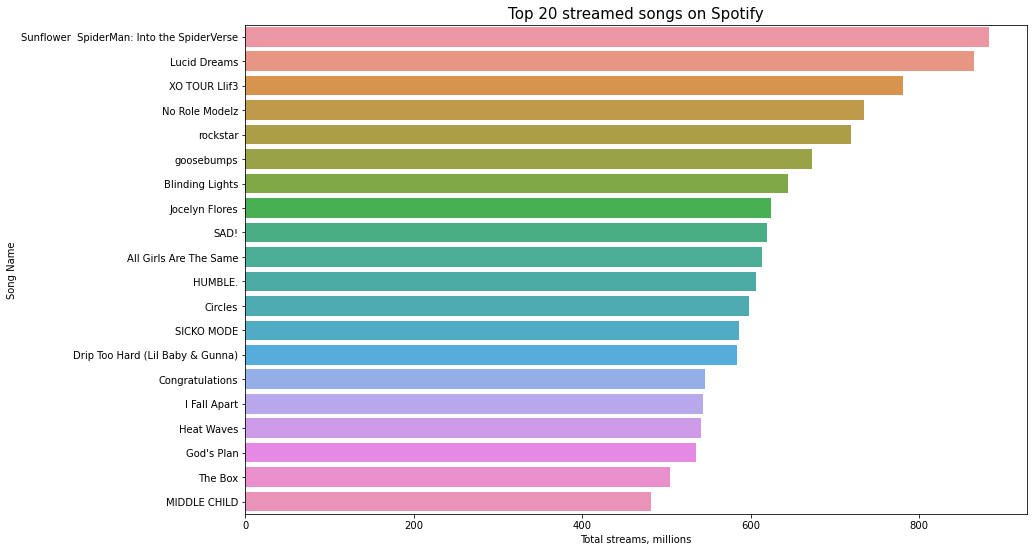

In [10]:
# top 20 streamed songs

plt.figure(figsize=(14, 9))
sns.barplot(y=data['Song Name'].head(20), x=(data['Total Streams'] / 1000000).head(20))
plt.title('Top 20 streamed songs on Spotify', size=15)
plt.xlabel('Total streams, millions')
plt.ylabel('Song Name')
plt.show()

<font size=4>Let's check for top artists on the Spotify.</font>

In [11]:
top_artists = data.groupby(['Artist Name'])['Total Streams'].sum().sort_values(ascending=False)[:20]

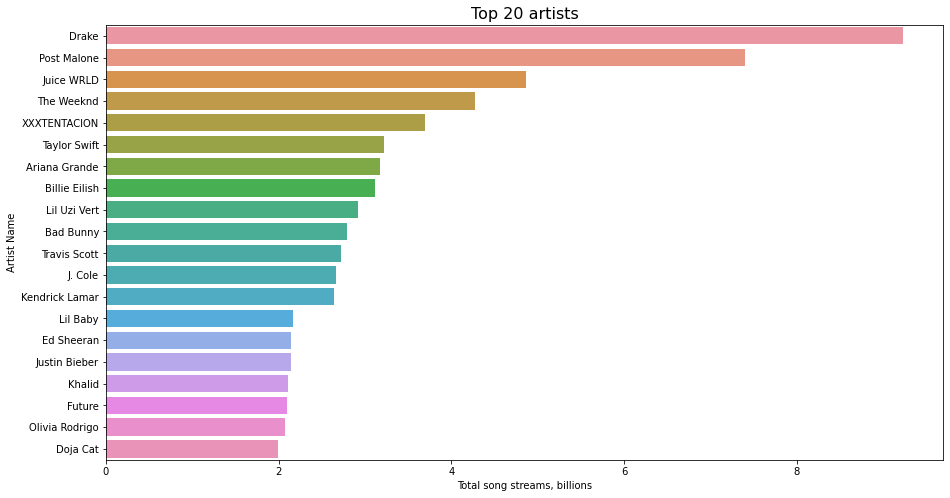

In [12]:
plt.figure(figsize=(15,8))
sns.barplot(y=top_artists.index, x=(top_artists.values)/ 1e9)
plt.title('Top 20 artists', size=16)
plt.xlabel('Total song streams, billions')
plt.show()

<font size=4>My favourite artist is The Weeknd. Let's check his top 5 most popular(streamed) songs on Spotify.</font>

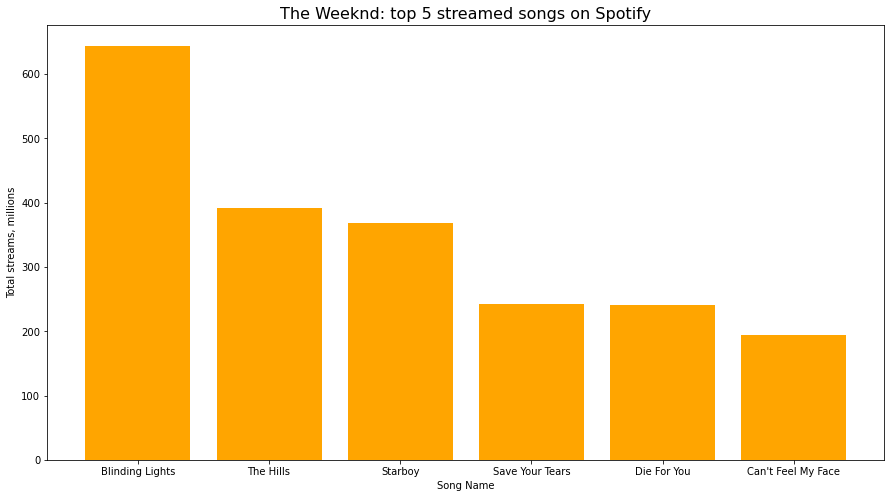

In [13]:
the_weeknd = data[data['Artist Name'] == 'The Weeknd']

plt.figure(figsize=(15,8))
plt.bar(x= the_weeknd['Song Name'].iloc[:6], height = (the_weeknd['Total Streams'] / 1000000)[:6], color='orange')
plt.title('The Weeknd: top 5 streamed songs on Spotify', size=16)
plt.xlabel('Song Name')
plt.ylabel('Total streams, millions')
plt.show()

<font size=4>Now let's find songs that entered list of Top 10 mostly.</font>

In [14]:
top_10 = data[['Song Name','Top 10 (xTimes)']].sort_values(by=['Top 10 (xTimes)'], ascending=False)

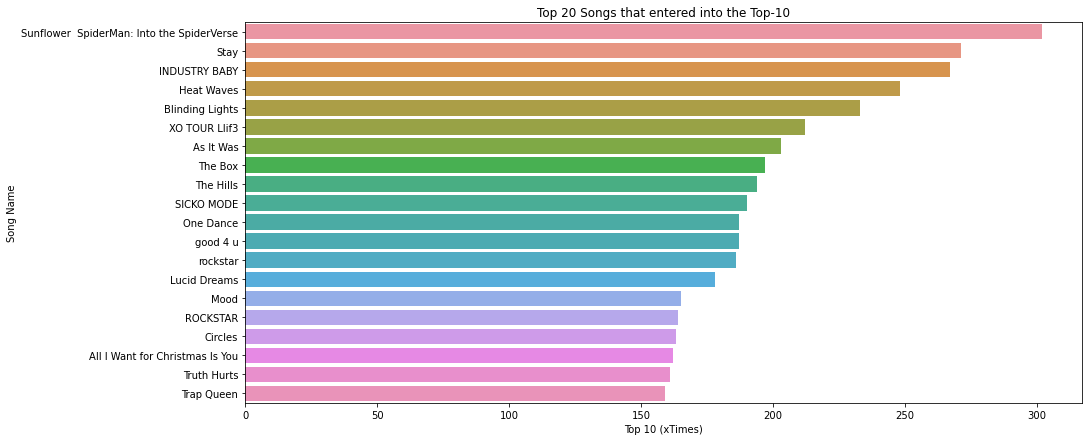

In [15]:
plt.figure(figsize=(15,7))
sns.barplot(x=top_10['Top 10 (xTimes)'][:20], y=top_10['Song Name'][:20])
plt.title('Top 20 Songs that entered into the Top-10')
plt.show()

<font size=4>Now let's look for any correlation between numerical features of the dataset.</font>

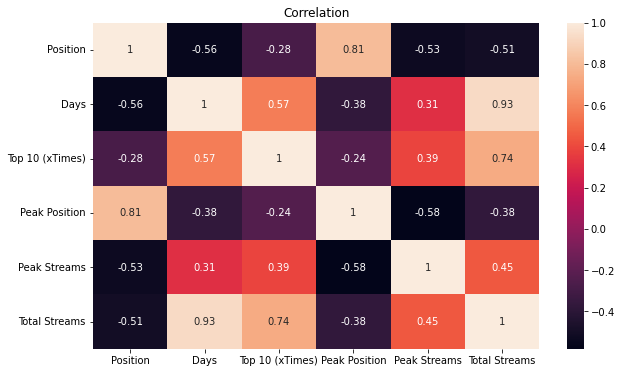

In [16]:
plt.figure(figsize=(10,6))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation')
plt.show()

<font size=4>There are some high correlation values.
Positive correlation:
- Days and Total Streams;
- Days and Top 10 (xTimes);
- Top 10 (xTimes) and Total Streams(the more the song is listened, the closer it takes to the top position);
- Position and Peak Position. It means that the higher positiong of the track, the higher probability that this song
would take the peak position;
- Peak Streams and Total Streams.

Negative correlation:
- Position and Days(the bigger position value, the newer the song is);
- Position and Peak Streams;
- Position and Total Streams(the bigger position value, the lower value of total streams(less people listen to it))</font>

<font size=4>Let's plot some scatter plots for some features with high correlation values.</font>

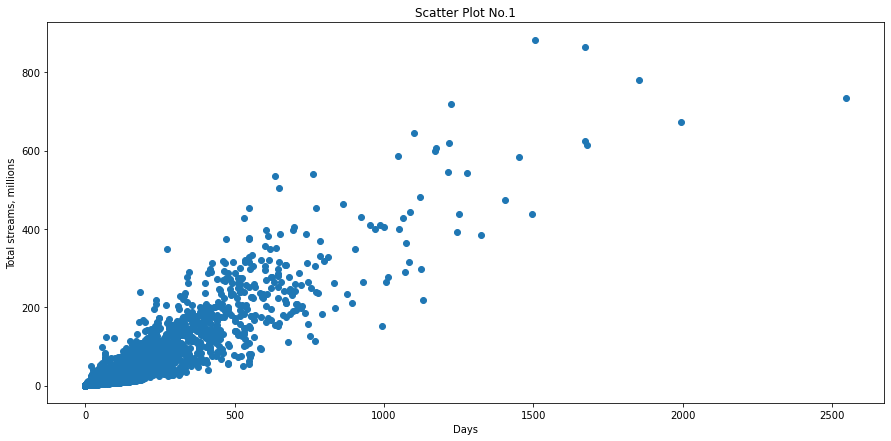

In [17]:
plt.figure(figsize=(15,7))
plt.scatter(data['Days'], data['Total Streams']/1e6)
plt.title('Scatter Plot No.1')
plt.xlabel('Days')
plt.ylabel('Total streams, millions')
plt.show()

<font size=4>This correlation between features Days and Total Streams also has logical explanation: the newer song, 
    the less it is listened by people.</font>

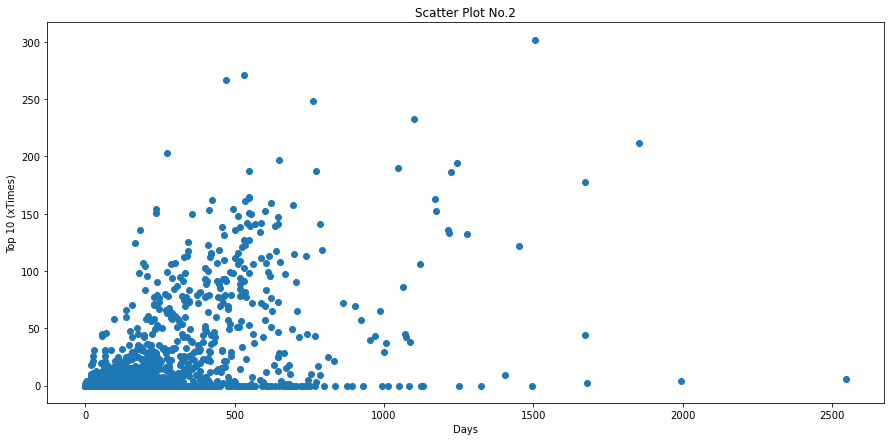

In [20]:
plt.figure(figsize=(15,7))
plt.scatter(data['Days'], data['Top 10 (xTimes)'])
plt.title('Scatter Plot No.2')
plt.xlabel('Days')
plt.ylabel('Top 10 (xTimes)')
plt.show()

<font size=4>Here I can also explain: the newer the song, the less likely it takes some top positions since 
    it isn't been streamed a lot yet. </font>

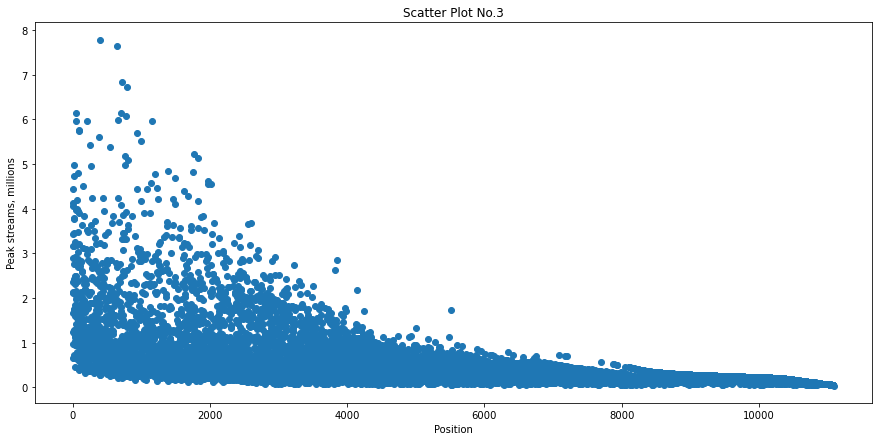

In [21]:
plt.figure(figsize=(15,7))
plt.scatter(data['Position'], data['Peak Streams']/1e6)
plt.title('Scatter Plot No.3')
plt.xlabel('Position')
plt.ylabel('Peak streams, millions')
plt.show()

<font size=4>So, the lower position(bigger value of it), the less likely it would take top-list.</font>

In [ ]:
# I will continue doing some visualisation

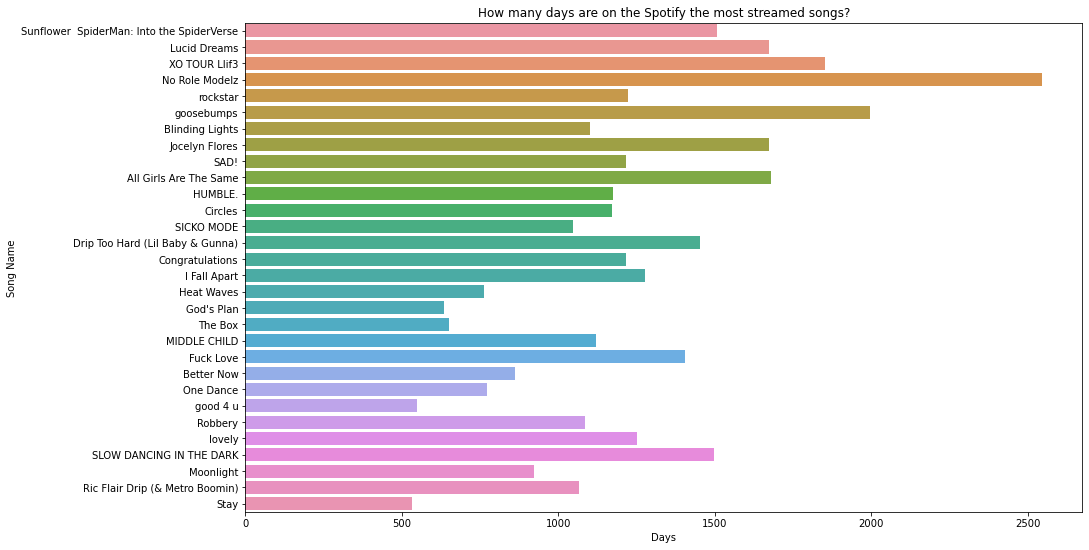

In [22]:
plt.figure(figsize=(15,9))
plt.title('How many days are on the Spotify the most streamed songs?')
sns.barplot(x=data['Days'][:30], y=data['Song Name'][:30])
plt.show()

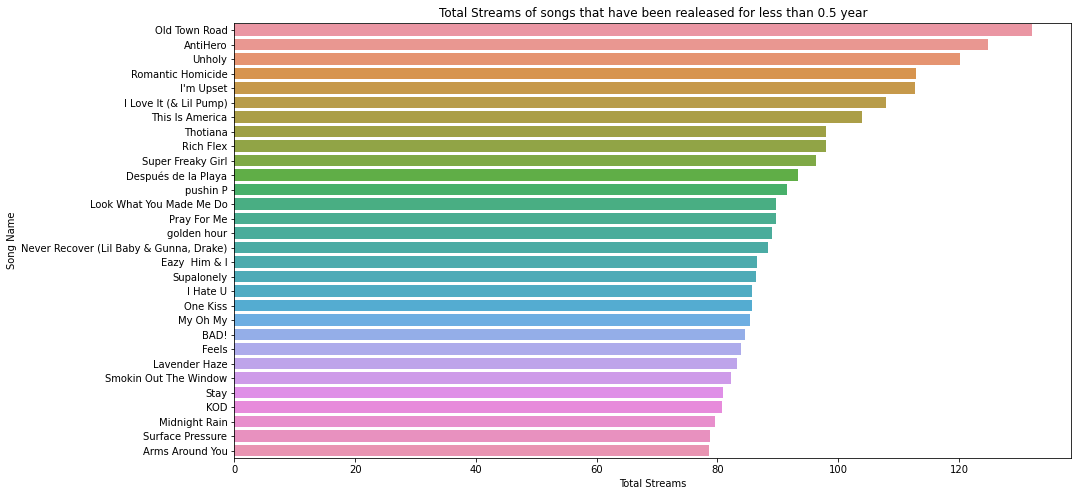

In [23]:
songs_half_year = data[data['Days'] < 180]
plt.figure(figsize=(15,8))
plt.title('Total Streams of songs that have been realeased for less than 0.5 year')
sns.barplot(x=(songs_half_year['Total Streams'] /1e6)[:30] , y=songs_half_year['Song Name'][:30])
plt.show()

In [51]:
# let's look for some hits that were released recently

young_hits = data[(data['Days'] < 31) & (data['Peak Position'] < 10)] 

In [52]:
young_hits

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
1028,1029,SZA,Kill Bill,20,18.0,1,(x16),2976280,49884805
1234,1235,Metro Boomin,Creepin',27,21.0,1,(x6),2132501,40029650
1426,1427,Metro Boomin,Superhero (Heroes & Villains) [with Future & C...,27,11.0,1,(x1),1773679,33127276
1561,1562,Taylor Swift,ME!,24,19.0,1,(x3),3578756,29380101
1592,1593,Bad Bunny,Dakiti,28,26.0,1,(x1),1205178,28652215
...,...,...,...,...,...,...,...,...,...
4904,4905,DaBaby,CAN'T STOP,5,1.0,9,0,1129304,2407369
4998,4999,Beyoncé,ENERGY,2,2.0,8,0,1339948,2290766
5005,5006,Drake,Dreams Money Can Buy,5,1.0,9,0,949340,2279028
5204,5205,Kendrick Lamar,untitled 01 08.19.2014.,4,1.0,6,0,889747,2030622


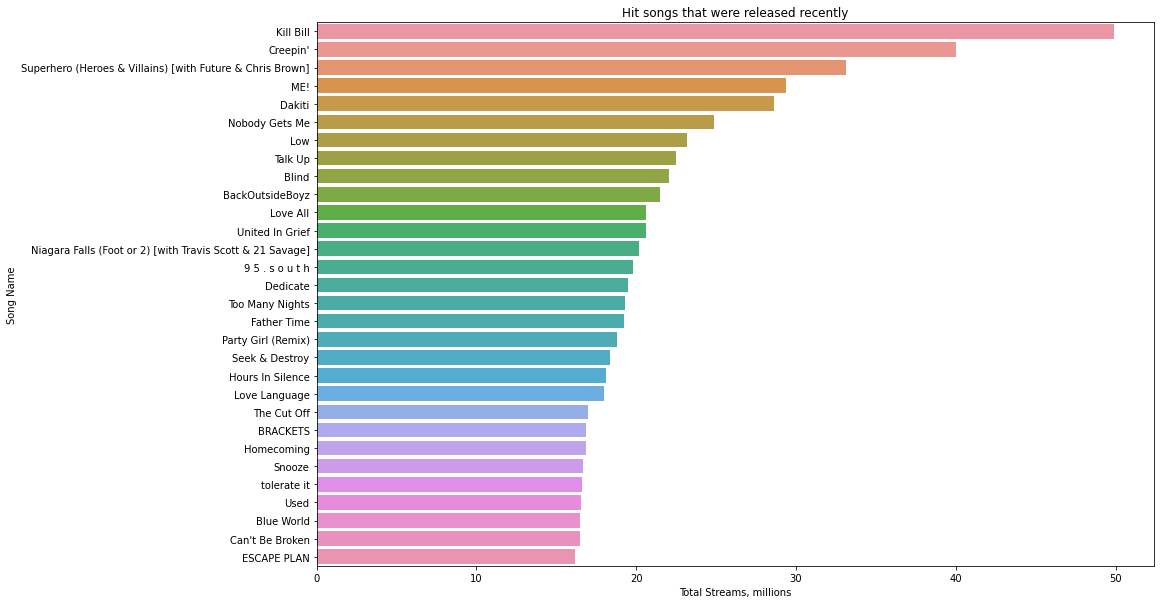

In [56]:
plt.figure(figsize=(15,10))
sns.barplot(y=young_hits['Song Name'][:30], x=(young_hits['Total Streams']/1e6)[:30])
plt.title('Hit songs that were released recently')
plt.xlabel('Total Streams, millions')
plt.show()